In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import dask.array as da
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
dirname='./data'

In [2]:
# Importation des `noms de métiers`
# Création du dico des `noms de métiers`
jobNames = pd.read_csv(os.path.join(dirname,'categories_string.csv'))['0'].to_dict()

# Importation du jeu de données d'entrainement
trainX=dd.read_json(os.path.join(dirname,'train.json'),lines=False).set_index('Id',n_partitions=10).categorize(columns=['gender'])

trainTarget=dd.read_csv(os.path.join(dirname, 'train_label.csv')).set_index('Id').categorize(columns=['Category'])

# Concatenation en un seul DataFrame pour visualiser
trainDF= trainX.assign(Category = trainTarget.Category)

#trainDF['description']=trainDF.apply(lambda x:prepareTxt(x['description']),axis=1,meta=(None, 'object'))

In [3]:
for key in jobNames.keys():
    print(key,jobNames[key])

0 pastor
1 model
2 yoga_teacher
3 teacher
4 personal_trainer
5 painter
6 journalist
7 interior_designer
8 surgeon
9 accountant
10 dj
11 physician
12 comedian
13 software_engineer
14 nurse
15 poet
16 dentist
17 chiropractor
18 filmmaker
19 professor
20 photographer
21 rapper
22 psychologist
23 paralegal
24 architect
25 composer
26 attorney
27 dietitian


In [3]:
df=trainDF.assign(prof=1*(trainDF.Category==19)).compute()
Y=df.prof
df.head()
#X_train, X_test, y_train, y_test = train_test_split(df.description, Y)

,description,gender,Category,prof
Id,,,,
0,She is also a Ronald D. Asmus Policy Entrepre...,F,19,1
1,He is a member of the AICPA and WICPA. Brent ...,M,9,0
2,Dr. Aster has held teaching and research posi...,M,19,1
3,He runs a boutique design studio attending cl...,M,24,0
4,"He focuses on cloud security, identity and ac...",M,24,0


In [10]:
# When use pipeline class
tfidf_vect=TfidfVectorizer(min_df=1000,ngram_range=(1, 3))
clf=SGDClassifier(early_stopping=True,n_jobs=-1)
pipeline = Pipeline([('vector',tfidf_vect),("clf",clf)])

In [ ]:
# fit
pipeline.fit(df.description,Y)

In [6]:
pipeline.named_steps['clf'].feature_importances_

AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'

In [ ]:
cross_val_score(pipeline, df.description,Y,scoring="f1", n_jobs=-1)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
#[print(item) for item in tfidf_vect.get_feature_names()]
len(tfidf_vect.get_feature_names())

7280

In [45]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return fi_df


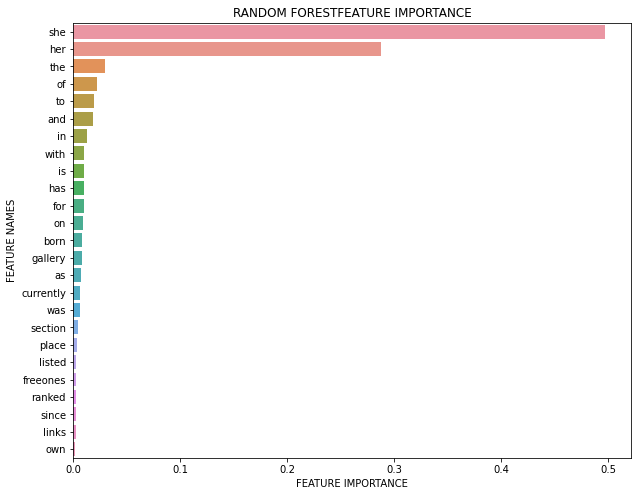

In [46]:
fi_df=plot_feature_importance(pipeline.named_steps['clf'].feature_importances_,tfidf_vect.get_feature_names(),'RANDOM FOREST')

In [47]:
print(fi_df)

   feature_names  feature_importance
19           she            0.496433
8            her            0.287241
21           the            0.029886
13            of            0.022336
22            to            0.019412
0            and            0.019076
9             in            0.013456
24          with            0.010669
10            is            0.010531
7            has            0.010428
4            for            0.010005
14            on            0.009272
2           born            0.008466
6        gallery            0.007931
1             as            0.007177
3      currently            0.006829
23           was            0.006624
18       section            0.004623
16         place            0.003343
12        listed            0.003149
5       freeones            0.003013
17        ranked            0.002972
20         since            0.002697
11         links            0.002598
15           own            0.001831
